## Importing Modules

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import pylab as rcParams
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from statsmodels.formula.api import ols
from statsmodels.tools import add_constant

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sales = pd.read_csv("E:/Data Science/DataCamp/Building Response Model R/mysales.csv",sep=",")

In [3]:
sales.head()

,OBS,SALES,PRICE,DISPLAY,COUPON,DISPLAYCOUPON
0,1,61.825479,1.090000,0,0,0
1,2,11.469201,1.271818,0,0,0
2,3,61.645996,1.271818,0,0,0
3,4,38.340422,1.271818,0,0,0
4,5,31.703434,1.271818,0,0,0


In [4]:
print(sales.dtypes)
print(sales.isnull().any())

OBS                int64
SALES            float64
PRICE            float64
DISPLAY            int64
COUPON             int64
DISPLAYCOUPON      int64
dtype: object
OBS              False
SALES            False
PRICE            False
DISPLAY          False
COUPON           False
DISPLAYCOUPON    False
dtype: bool


## Understanding sales

sales.data contains information on beer volume SALES recorded over 124 WEEKS as well as past marketing activities run by the brewery such as PRICE, DISPLAY, and COUPON promotion campaigns.

To get a first impression about volume SALES you calculate some simple descriptive performance indicators. You calculate the average number of SALES using the function mean() and the minimum and maximum SALES using the functions min() and max().

In [5]:
sales_mean = np.mean(sales['SALES'])
print('Mean: \n', sales_mean)
print('Minimum: \n', np.min(sales['SALES']))
print('Maximum: \n', np.max(sales['SALES']))

Mean: 
 118.82617921979504
Minimum: 
 11.4692012003
Maximum: 
 1406.69804988


## Building a linear response model for sales

In the past, the brewery ran several price promotion campaigns that are causing price levels to vary. Now, the marketing manager wants to know to what extent these price changes influenced sales.

You start explaining the effect of changes in PRICE to changes in SALES by using the linear model function lm(). The lm() function requires the specification of the sales - price relation via the formula argument SALES ~ PRICE. The estimated coefficients for the linear sales response model can be obtained by using the function coef().

In [6]:
X = sales[["PRICE"]]
y = sales[["SALES"]]

# Fit and make the predictions by the model
salesmodel = sm.OLS(y, X).fit()
predictions = salesmodel.predict(X)

# Print out the statistics
salesmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     66.00
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           4.02e-13
Time:                        20:50:07   Log-Likelihood:                -805.20
No. Observations:                 124   AIC:                             1612.
Df Residuals:                     123   BIC:                             1615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PRICE        100.8283     12.411      8.124      0.000      76.262     125.395
==============================================================================
Omnibus:                      161.166   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6023.086
Skew:                           4.774   Prob(JB):                         0.00
Kurtosis:                      35.781   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
reg = LinearRegression()
Smodel = reg.fit(X,y)
print('Coefficients: \n',Smodel.coef_) 
print( 'Intercept: \n',Smodel.intercept_)

Coefficients: 
 [[-134.30965829]]
Intercept: 
 [ 274.24858034]


## Making Predictions

To improve pricing decisions, the marketing manager needs to know how many sales can be expected under alternative prices. In particular, he wants to know the expected volume sales for the unit prices of 1.05 and 0.95?

You can use the coefficients of your linear.model to make these predictions. The coef() function returns a numeric coefficient vector with two elements. The first element is the sales intercept which can be accessed via [1] and the second element is the price slope which can be accessed via [2]. 

You obtain the expected sales by simply adding the price slope multiplied by 1.05 and 0.95 to the sales intercept.

In [8]:
print('Prediction 1: \n',(Smodel.intercept_ + (0.95 * (Smodel.coef_))))
print('prediction 2: \n',(Smodel.intercept_ + (1.05 * (Smodel.coef_))))

Prediction 1: 
 [[ 146.65440496]]
prediction 2: 
 [[ 133.22343913]]


## Predictive performance

You can use your model to make predictions for any chosen price level. Obtaining reasonable predictions is dependant on the correctness of your assumption that volume sales and unit price are linearly related.

You display the relation between SALES and PRICE in a simple scatterplot by using the function plot(). Likewise the lm() function, the plot() function operates on the formula argument SALES ~ PRICE. 

You can add the model predictions to the graph by using the function line(). The line() function adds a straight line specified in sales intercept/ price slope form when applied to the coefficient vector of the linear.model object.

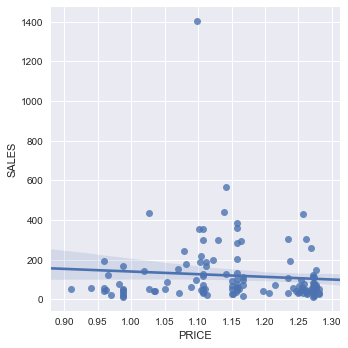

In [13]:
# Plot outputs
sns.lmplot(data=sales,
           x='PRICE',
           y='SALES')
plt.show()

In [10]:
reg = LinearRegression().fit(sales[['PRICE']],sales.SALES)
reg.score(sales[['PRICE']],sales.SALES)

0.0075765227042884353

## Nonlinear response models

### Linearizing nonlinear functions

The microbrewery plans to expand their business and to offer Hoppiness nationwide. Therefore, pricing decisions need to be made by the manager for more than one store.

Stores might differ not only in location, but also in activity and in the number of volume sales. A solution is to explain the effect of changes in PRICE relative to changes in SALES.

This is achieved by taking the log() of the SALES. The corresponding log(SALES) ~ PRICE relation is again estimated by the function lm() and the estimated coefficients for the nonlinear sales response model can obtained by using the function coef().

In [14]:
LogModel = LinearRegression().fit(sales[['PRICE']],np.log(sales.SALES))

In [15]:
print('Coefficients: \n',LogModel.coef_) 
print( 'Intercept: \n',LogModel.intercept_)

Coefficients: 
 [-0.6622516]
Intercept: 
 5.08439828306


In [16]:
sales["logsales"] = np.log(sales[['SALES']])

## What is the value added ?

The problem of bad model predictions is still an open issue. This time, you investigate the relation between log(SALES) and PRICE. 

The corresponding scatterplot is created using the formula argument log(SALES) ~ PRICE in the plot() function. Again, the model predictions obtained from the log.model are graphed using the abline() function.

The line() function adds a straight line specified in log-sales intercept/ price slope form when applied to the coefficient vector obtained for the LogModel object .

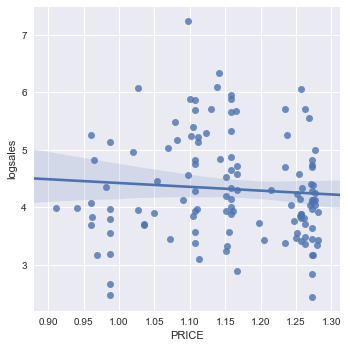

In [17]:
# Plot outputs
sns.lmplot(data=sales,
           x='PRICE',
           y='logsales')
plt.show()

## Summarizing dummy variables

In [15]:
sales["DISPLAY"].value_counts()

0    91
1    33
Name: DISPLAY, dtype: int64

## The effect of display on sales

Selling craft beer is highly competitive. Increasing in-store visibility usually generates additional sales. Therefore, the brewery makes use of point-of-sales display ads. The volume sales of Hoppiness were recorded for all weeks with and without displays.

You start with calculating the number of DISPLAY activity relative to the 124 weeks. Counting can be done by using the function value_counts(). Calculating the relative occurrence is equivalent to averaging by using the function mean().

To see how much of an effect the DISPLAY actions have on SALES you construct a response model for explaining log(SALES) by DISPLAY. The log(SALES) ~ DISPLAY relation is again estimated by the function lm() and the estimated coefficients are extracted by the function coef().

In [19]:
print(sales["DISPLAY"].value_counts()/np.sum(sales["DISPLAY"].value_counts()))
print('Display of the ads: \n', np.mean(sales["DISPLAY"])) 
print('No Display of the ads: \n', (1 - np.mean(sales["DISPLAY"])))

0    0.733871
1    0.266129
Name: DISPLAY, dtype: float64
Display of the ads: 
 0.2661290322580645
No Display of the ads: 
 0.7338709677419355


In [17]:
dummy_model = LinearRegression().fit(sales[['DISPLAY']],np.log(sales.SALES))
print('Coefficients: \n',dummy_model.coef_)
print('Intercept: \n', dummy_model.intercept_)

Coefficients: 
 [ 0.46252427]
Intercept: 
 4.19495321984


In [18]:
# Average unit sales for no Display
np.exp(dummy_model.intercept_)

66.350627611398082

In [19]:
# Switching from no-display to display
np.exp(dummy_model.coef_ - 1)

array([ 0.58422113])

## More dummies

The brewery also distributed manufacturer coupons, offering price reductions for Hoppiness. A third marketing strategy was to combine display and coupon activity to increase beer volume sales.

This time, you will calculate the mean of DISPLAY, COUPON and DISPLAYCOUPON by using the function mean(). You can also do a shortcut by using the function describe().

In [20]:
sales.describe()

,OBS,SALES,PRICE,DISPLAY,COUPON,DISPLAYCOUPON,logsales
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,62.500000,118.826179,1.157195,0.266129,0.096774,0.056452,4.318044
std,35.939764,159.299970,0.103239,0.443725,0.296849,0.231728,0.899595
min,1.000000,11.469201,0.910833,0.000000,0.000000,0.000000,2.439665
25%,31.750000,40.717909,1.101909,0.000000,0.000000,0.000000,3.706666
50%,62.500000,62.024212,1.157692,0.000000,0.000000,0.000000,4.127520
75%,93.250000,126.716999,1.257115,1.000000,0.000000,0.000000,4.841841
max,124.000000,1406.698050,1.280769,1.000000,1.000000,1.000000,7.249000


### The effect of multiple dummies on sales

To describe the effects of coupon and display activity on volume sales you have to take the DISPLAY, COUPON, and DISPLAYCOUPON predictors simultaneously into account. You can do this by successively adding the predictors to the response function.

The relation is again estimated by the function lm() and the corresponding coefficients can as usually be obtained by using the coef() function.

In [30]:
X_sales = sales[["DISPLAY","COUPON","DISPLAYCOUPON","PRICE"]]
y_sales = sales["logsales"]

In [31]:
NewModel = LinearRegression().fit(X_sales,y_sales)
print('Coefficients: \n',NewModel.coef_)
print('Intercept: \n', NewModel.intercept_)

Coefficients: 
 [ 0.87468186  1.76456566  2.16297894  0.31234118]
Intercept: 
 3.43095854915


## How to Lag?

Possibly, customers do not immediately react to price reductions of Hoppiness. Therefore, it is important to check if the effect of price promotion might extend to the next week. You can do this by adding lags into your model.

Lagging a variable means shifting the time base back by a given number of observations. This can be done by using the function lag(). The lag() function takes only one argument; n = 1, by default for defining the number of periods to be shifted.

You apply lag() on PRICE and compare the result to the original PRICE by using the function cbind(). To display only the first six elements of the data columns, you can use the function head().

In [32]:
Pricelag = sales['PRICE'].shift(1)

In [33]:
Pricelag = Pricelag.fillna(0)

In [23]:
Pricelag.dtype

dtype('float64')

In [24]:
np.where(Pricelag.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [25]:
np.isnan(Pricelag.values.any())

False

In [26]:
sales["Pricelag"] = Pricelag

In [27]:
X_new = sales[["PRICE", "Pricelag"]]

In [28]:
X_new.head()

,PRICE,Pricelag
0,1.090000,0.000000
1,1.271818,1.090000
2,1.271818,1.271818
3,1.271818,1.271818
4,1.271818,1.271818


### Adding Lagged price effects

Next, you will check if the effects of temporary price changes on sales extend into the next period.

Like before, you shift the PRICE predictor back by using the function lag(). The result is assigned to a new variable Price.lag. The Price.lag variable is added to the log(SALES) ~ PRICE relationship. This simple lag-model can also be estimated by using the function lm() and the estimated coefficients are obtained by using the function coef()

In [36]:
LagModel = LinearRegression().fit(X_new,y_sales)
print('Coefficients: \n',LagModel.coef_)
print('Intercept: \n', LagModel.intercept_)

Coefficients: 
 [-1.98857004  1.56446049]
Intercept: 
 4.82206905843


## More Lags

It might be interesting to learn if coupon actions only cause an immediate effect on sales or if the effect continues into the next period.

Again, you shift the COUPON predictor back by using the function lag(). The result is assigned to a new variable Coupon.lag. Both, the original COUPON and the Coupon.lag variables, are added to the log(SALES) ~ PRICE + Price.lag relationship by using the function.

In [38]:
Couponlag = sales['COUPON'].shift(1)
Couponlag = Couponlag.fillna(0)
Couponlag.dtype

dtype('float64')

In [39]:
np.where(Couponlag.values >= np.finfo(np.float64).max)
np.isnan(Couponlag.values.any())

False

In [40]:
sales["Couponlag"] = Couponlag
X_C = sales[["PRICE", "Pricelag","COUPON","Couponlag"]]

In [41]:
CouponlagModel = LinearRegression().fit(X_C,y_sales)
print('Coefficients: \n',CouponlagModel.coef_)
print('Intercept: \n', CouponlagModel.intercept_)

Coefficients: 
 [-1.91888089  1.47820806  1.34872223 -0.40314528]
Intercept: 
 4.74899817568


In [42]:
Displaylag = sales['DISPLAY'].shift(1)
Displaylag = Displaylag.fillna(0)
np.where(Displaylag.values >= np.finfo(np.float64).max)
np.isnan(Displaylag.values.any())
sales["Displaylag"] = Displaylag

In [43]:
DisplayCPlag = sales['DISPLAYCOUPON'].shift(1)
DisplayCPlag = DisplayCPlag.fillna(0)
np.where(DisplayCPlag.values >= np.finfo(np.float64).max)
np.isnan(DisplayCPlag.values.any())
sales["DisplayCPlag"] = DisplayCPlag

In [44]:
sales.head()

,OBS,SALES,PRICE,DISPLAY,COUPON,DISPLAYCOUPON,logsales,Pricelag,Couponlag,Displaylag,DisplayCPlag
0,1,61.825479,1.090000,0,0,0,4.124316,0.000000,0.0,0.0,0.0
1,2,11.469201,1.271818,0,0,0,2.439665,1.090000,0.0,0.0,0.0
2,3,61.645996,1.271818,0,0,0,4.121408,1.271818,0.0,0.0,0.0
3,4,38.340422,1.271818,0,0,0,3.646505,1.271818,0.0,0.0,0.0
4,5,31.703434,1.271818,0,0,0,3.456425,1.271818,0.0,0.0,0.0


## What's the value added ?

You still remember the bad performance of your first simple response model. Now, you are getting curious about the value added by taking lags. You combine all the marketing tools and their lagged-effects in one model named extended.model.

You start with displaying the relation between log(SALES) and the running index by using the plot() function. This time, you obtain the model predictions by using the function fitted() on the extended.model object. 

To account for the loss of the first observation due to the lag operation you append NA to the vector of predicted values. You add the model predictions to the graph by using the function lines(). The lines() function joins the predicted data points using line segments.

In [45]:
X_Extended = sales[["Pricelag","Couponlag","Displaylag","DisplayCPlag","PRICE","DISPLAY","COUPON","DISPLAYCOUPON"]]

In [46]:
model = sm.OLS(y_sales,X_Extended)
model_fit = model.fit()

## Summarizing the  Model

Awesome, your last model did a really good job in predicting the sales of Hoppiness. When reporting to the company, you need to quantify this achievement and give some conclusions about the importance of the marketing activities for explaining the sales of Hoppiness.

You can get what you need in a single step by simply applying the function summary() to the extended.model object. The summary() function also summarizes information on your model regarding model fit (R-squared and Adjusted R-squared) and the importance of the effects (P-values).

In [147]:
model_fitted_y = model_fit.fittedvalues
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logsales   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     814.6
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           4.12e-98
Time:                        18:19:51   Log-Likelihood:                -109.09
No. Observations:                 124   AIC:                             234.2
Df Residuals:                     116   BIC:                             256.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Pricelag          0.8592      0.482      1.783      0.077      -0.095       1.814
Couponlag        -0.1808      0.188     -0.961      0.339      -0.554       0.192
Displaylag        0.5099      0.136      3.744      0.000       0.240       0.780
DisplayCPlag      0.4798      0.251      1.912      0.058      -0.017       0.977
PRICE             2.2981      0.472      4.864      0.000       1.362       3.234
DISPLAY           0.7552      0.144      5.248      0.000       0.470       1.040
COUPON            1.8704      0.189      9.895      0.000       1.496       2.245
DISPLAYCOUPON     2.1832      0.242      9.040      0.000       1.705       2.662
==============================================================================
Omnibus:                        0.790   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.443
Skew:                          -0.118   Prob(JB):                        0.801
Kurtosis:                       3.175   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

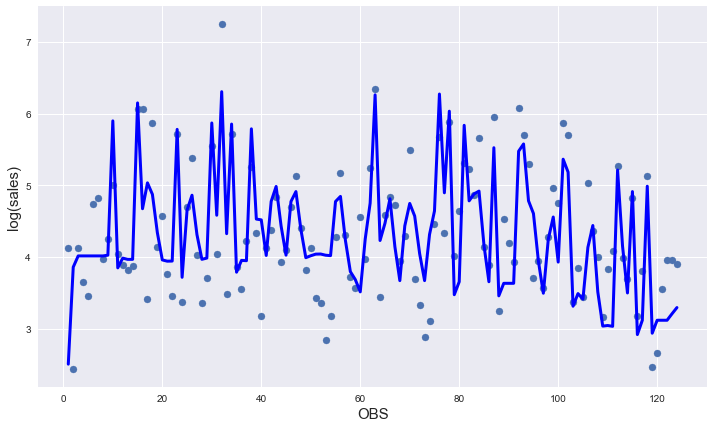

In [130]:
plt.figure(figsize=(12,7))
plt.scatter(sales["OBS"],y_sales)
plt.plot(sales["OBS"],model_fitted_y,color='blue', linewidth=3)
plt.xlabel("OBS")
plt.ylabel("log(sales)")
plt.show()

## Dropping predictors

To obtain support for your decision, you compare the model fit of the full model to the model excluding the lagged coupon effect by its AIC.

Likewise, updating a model for the inclusion of an additional predictor, you can also drop a predictor by using the function update(). You just need to put a minus sign in front of the Coupon.lag predictor when updating the extended.model object. Then, the AIC value is obtained by using the function AIC().

In [137]:
print(model_fit.aic)

234.177489824


In [50]:
X_Ext = sales[["Pricelag","Displaylag","DisplayCPlag","PRICE","DISPLAY","COUPON","DISPLAYCOUPON"]]

In [51]:
model1 = sm.OLS(y_sales,X_Ext)
model1_fit = model1.fit()

In [52]:
print(model1_fit.aic)

233.160370208


## Eliminating Predictors

You do not want to exclude the lagged coupon effect yet. The company needs a really sound model to improve it's future marketing decisions and to effectively run their campaign. To be 100% sure, you perform backward elimination of variables on the extended.model object by using the function stepAIC(). The function is loaded from the add-on package MASS.

The argument direction = "backward" starts the selection process with the extended.model. The argument trace = TRUE suppresses information to be printed during the running of the selection process. The final model, resulting in the minimum AIC value, is summarized by the function summary().

In [150]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = X_Ext
y = y_sales


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  COUPON                         with p-value 1.29466e-07
Add  DISPLAYCOUPON                  with p-value 1.03795e-10
Add  DISPLAY                        with p-value 7.23904e-11
Add  Displaylag                     with p-value 0.00417925
resulting features:
['COUPON', 'DISPLAYCOUPON', 'DISPLAY', 'Displaylag']
